In [79]:
# Install necessary packages if not already installed (uncomment to install)
# !pip install pandas numpy matplotlib seaborn jiwer

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jiwer import wer, cer, compute_measures
import os

# Set seaborn style for plots
sns.set(style='whitegrid')
%matplotlib inline


## Loading the Dataset

In [80]:
# Specify the CSV file path
csv_file_path = 'inferenced_dataset.csv'  # Replace with your actual CSV file path

# Check if the file exists
if os.path.isfile(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)
    print(f"Data loaded successfully. Number of samples: {len(df)}")
else:
    print(f"CSV file {csv_file_path} does not exist.")


Data loaded successfully. Number of samples: 180


## Cleaning

In [81]:
# Check for missing values
missing_gold_label = df['Gold Label'].isnull().sum()
missing_response = df['Response'].isnull().sum()
print(f"Missing 'Gold Label' entries: {missing_gold_label}")
print(f"Missing 'Response' entries: {missing_response}")

# Drop rows with missing 'Gold Label' or 'Response'
df.dropna(subset=['Gold Label', 'Response'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Confirm data after preprocessing
print(f"Data after preprocessing. Number of samples: {len(df)}")


Missing 'Gold Label' entries: 0
Missing 'Response' entries: 0
Data after preprocessing. Number of samples: 180


## Defining Evaluation Functions

In [82]:
# Function to compute WER, CER, and detailed error counts for each pair of texts
def compute_error_rates(df):
    """
    Computes WER, CER, and error counts for each row in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Gold Label' and 'Response' columns.

    Returns:
        pd.DataFrame: DataFrame with additional 'WER', 'CER', and error count columns.
    """
    wer_list = []
    cer_list = []
    substitutions = []
    insertions = []
    deletions = []
    hits = []
    for idx, row in df.iterrows():
        ground_truth = str(row['Gold Label']).strip()
        hypothesis = str(row['Response']).strip()
        # Compute WER and CER
        wer_value = wer(ground_truth, hypothesis)
        cer_value = cer(ground_truth, hypothesis)
        wer_list.append(wer_value)
        cer_list.append(cer_value)
        # Compute detailed error counts
        measures = compute_measures(ground_truth, hypothesis)
        substitutions.append(measures['substitutions'])
        insertions.append(measures['insertions'])
        deletions.append(measures['deletions'])
        hits.append(measures['hits'])
    df['WER'] = wer_list
    df['CER'] = cer_list
    df['Substitutions'] = substitutions
    df['Insertions'] = insertions
    df['Deletions'] = deletions
    df['Hits'] = hits
    return df


### Computing Error Rates

In [83]:
# Compute WER, CER, and detailed error counts
df = compute_error_rates(df)
print("Error rates computed successfully.")


Error rates computed successfully.


## Statistical Analysis

In [84]:
# Compute overall statistics
wer_mean = df['WER'].mean()
wer_median = df['WER'].median()
wer_std = df['WER'].std()

cer_mean = df['CER'].mean()
cer_median = df['CER'].median()
cer_std = df['CER'].std()

print(f"WER - Mean: {wer_mean:.4f}, Median: {wer_median:.4f}, Std: {wer_std:.4f}")
print(f"CER - Mean: {cer_mean:.4f}, Median: {cer_median:.4f}, Std: {cer_std:.4f}")

WER - Mean: 0.2797, Median: 0.2377, Std: 0.1847
CER - Mean: 0.1262, Median: 0.0766, Std: 0.1202


## Data Visualization

### Distribution of WER

c:\Users\Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


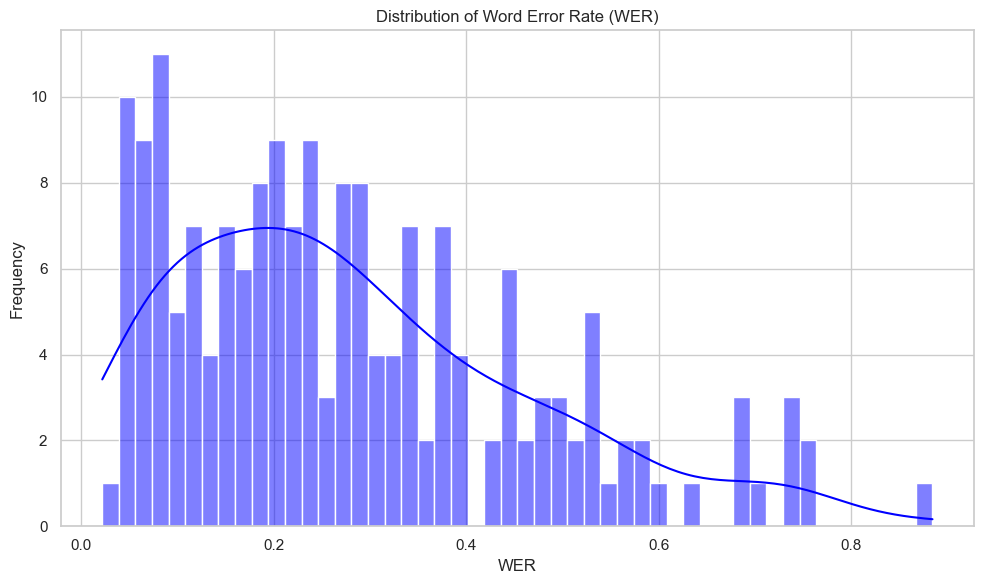

In [85]:
# Plot histogram of WER
plt.figure(figsize=(10, 6))
sns.histplot(df['WER'], bins=50, kde=True, color='blue')
plt.title('Distribution of Word Error Rate (WER)')
plt.xlabel('WER')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Distribution of CER

c:\Users\Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


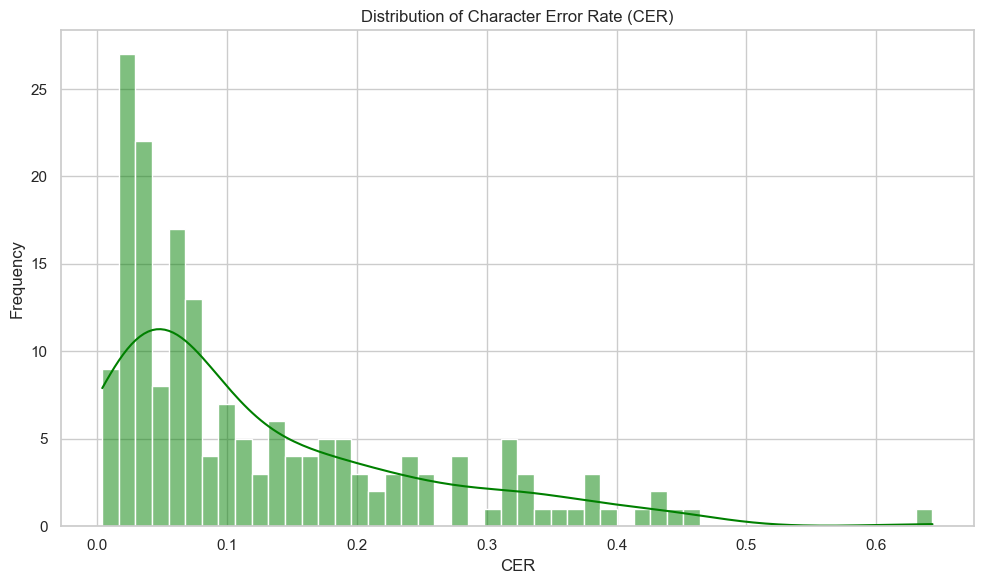

In [86]:
# Plot histogram of CER
plt.figure(figsize=(10, 6))
sns.histplot(df['CER'], bins=50, kde=True, color='green')
plt.title('Distribution of Character Error Rate (CER)')
plt.xlabel('CER')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Box Plots of WER and CER

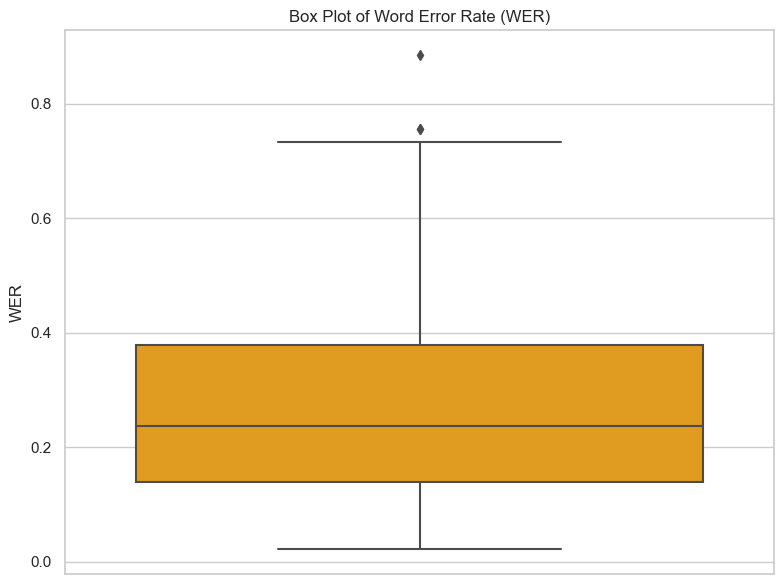

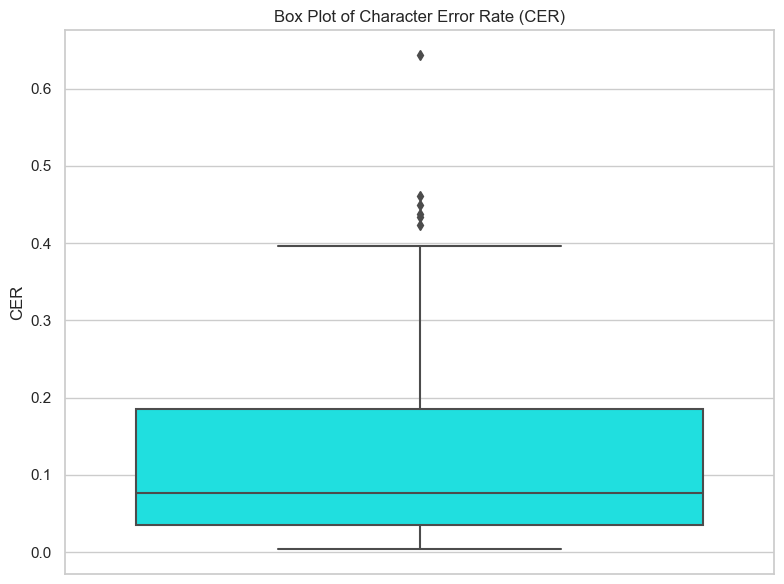

In [87]:
# Box plot of WER
plt.figure(figsize=(8, 6))
sns.boxplot(y='WER', data=df, color='orange')
plt.title('Box Plot of Word Error Rate (WER)')
plt.ylabel('WER')
plt.tight_layout()
plt.show()

# Box plot of CER
plt.figure(figsize=(8, 6))
sns.boxplot(y='CER', data=df, color='cyan')
plt.title('Box Plot of Character Error Rate (CER)')
plt.ylabel('CER')
plt.tight_layout()
plt.show()


### Violin Plots of WER and CER

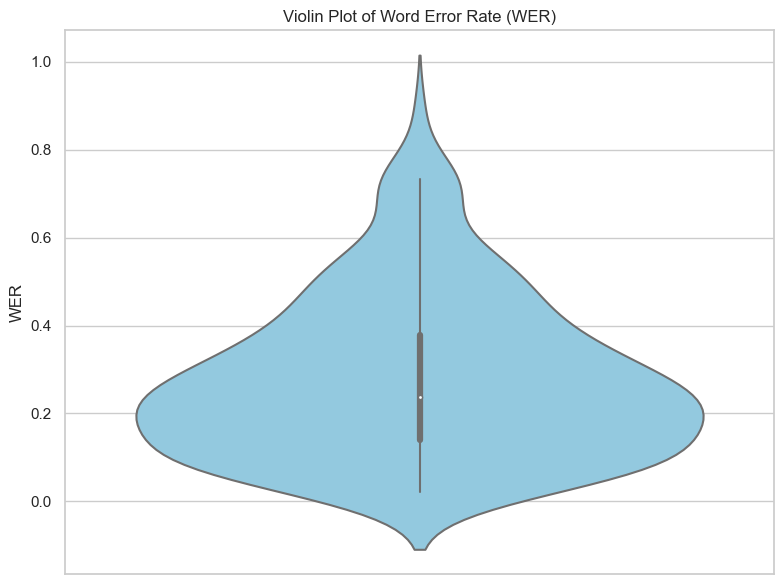

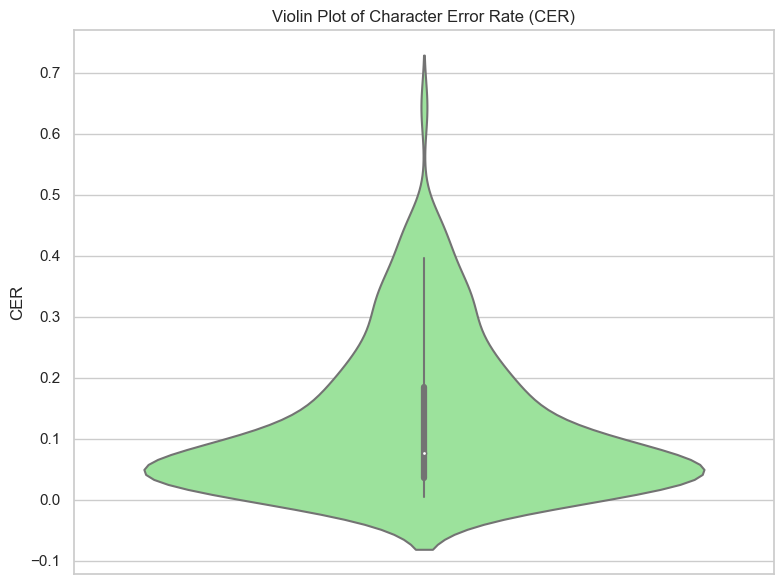

In [88]:
# Violin plot of WER
plt.figure(figsize=(8, 6))
sns.violinplot(y='WER', data=df, color='skyblue')
plt.title('Violin Plot of Word Error Rate (WER)')
plt.ylabel('WER')
plt.tight_layout()
plt.show()

# Violin plot of CER
plt.figure(figsize=(8, 6))
sns.violinplot(y='CER', data=df, color='lightgreen')
plt.title('Violin Plot of Character Error Rate (CER)')
plt.ylabel('CER')
plt.tight_layout()
plt.show()

### Cumulative Distribution Function (CDF) of WER and CER

c:\Users\Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


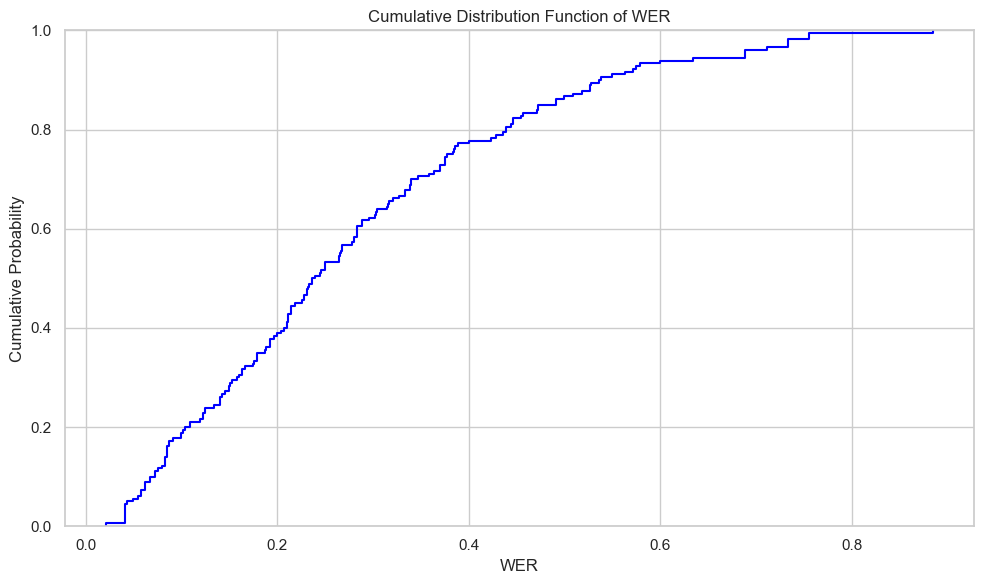

c:\Users\Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


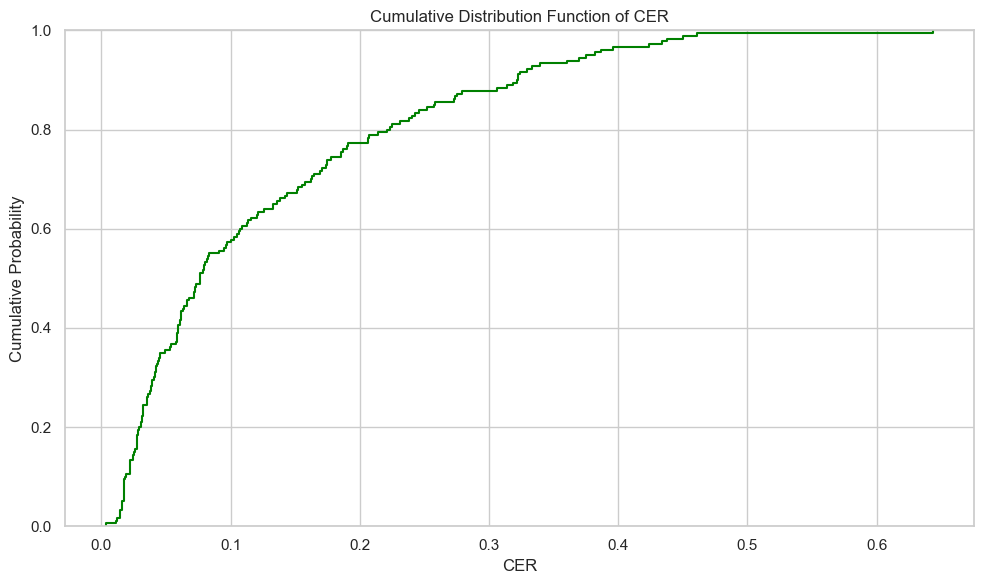

In [89]:
# CDF of WER
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['WER'], color='blue')
plt.title('Cumulative Distribution Function of WER')
plt.xlabel('WER')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

# CDF of CER
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['CER'], color='green')
plt.title('Cumulative Distribution Function of CER')
plt.xlabel('CER')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

### Scatter Plots of WER vs CER

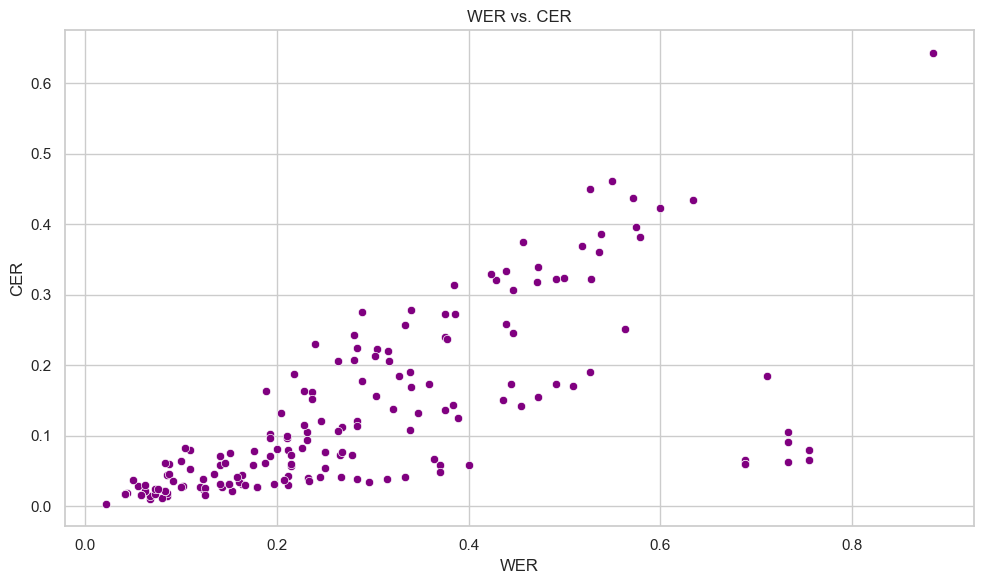

In [90]:
# Scatter plot of WER vs. CER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WER', y='CER', data=df, color='purple')
plt.title('WER vs. CER')
plt.xlabel('WER')
plt.ylabel('CER')
plt.tight_layout()
plt.show()

### Error Types Distribution

c:\Users\Abdullah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


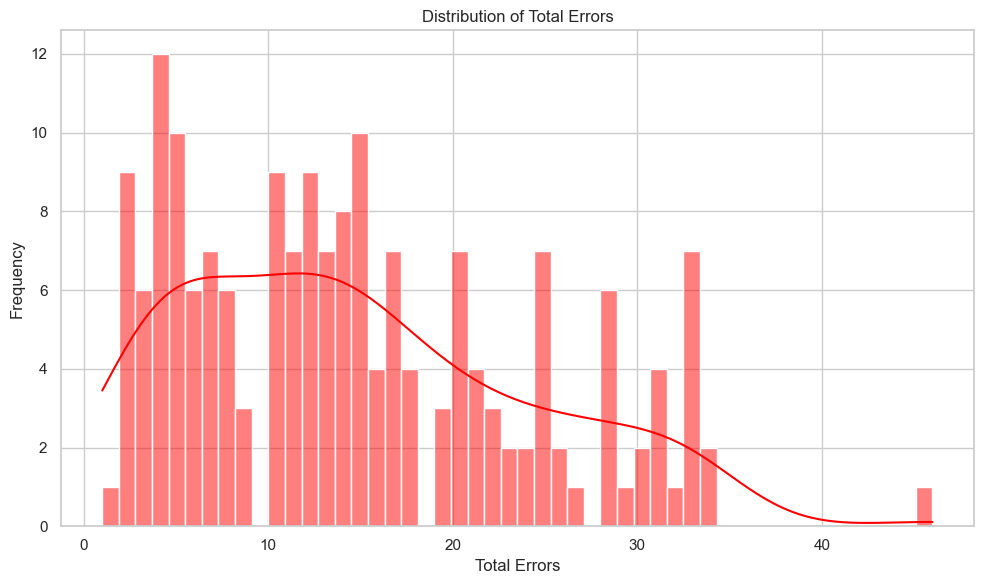

In [91]:
# Compute total errors
df['Total Errors'] = df['Substitutions'] + df['Insertions'] + df['Deletions']

# Histogram of total errors
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Errors'], bins=50, kde=True, color='red')
plt.title('Distribution of Total Errors')
plt.xlabel('Total Errors')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Proportions of Error Types

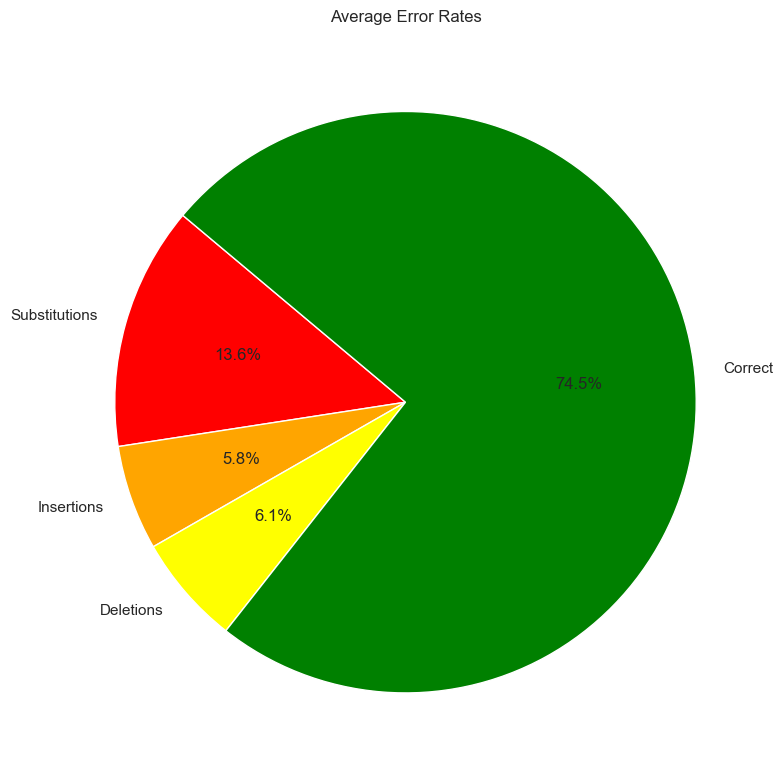

In [92]:
# Compute total operations
df['Total Operations'] = df['Substitutions'] + df['Insertions'] + df['Deletions'] + df['Hits']
df['Substitution Rate'] = df['Substitutions'] / df['Total Operations']
df['Insertion Rate'] = df['Insertions'] / df['Total Operations']
df['Deletion Rate'] = df['Deletions'] / df['Total Operations']
df['Accuracy Rate'] = df['Hits'] / df['Total Operations']

# Mean rates
sub_rate_mean = df['Substitution Rate'].mean()
ins_rate_mean = df['Insertion Rate'].mean()
del_rate_mean = df['Deletion Rate'].mean()
acc_rate_mean = df['Accuracy Rate'].mean()

# Pie chart of average error rates
labels = ['Substitutions', 'Insertions', 'Deletions', 'Correct']
sizes = [sub_rate_mean, ins_rate_mean, del_rate_mean, acc_rate_mean]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'orange', 'yellow', 'green'])
plt.title('Average Error Rates')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Correlation Matrix Heatmap

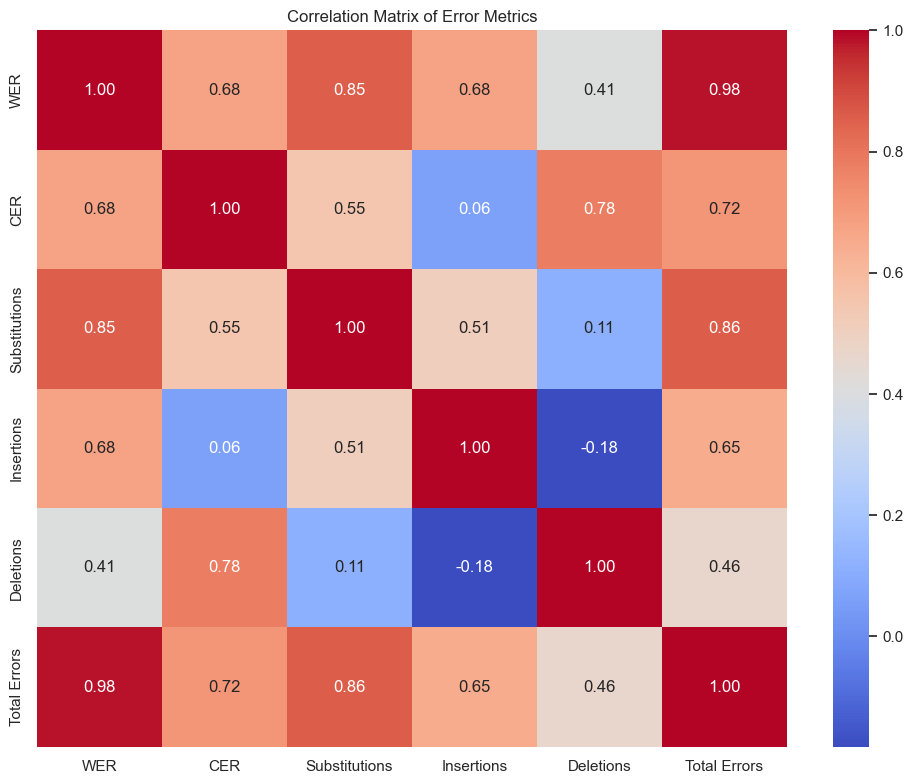

In [93]:
# Compute correlation matrix
corr = df[['WER', 'CER', 'Substitutions', 'Insertions', 'Deletions', 'Total Errors']].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Error Metrics')
plt.tight_layout()
plt.show()

### Error Rates by Text Length

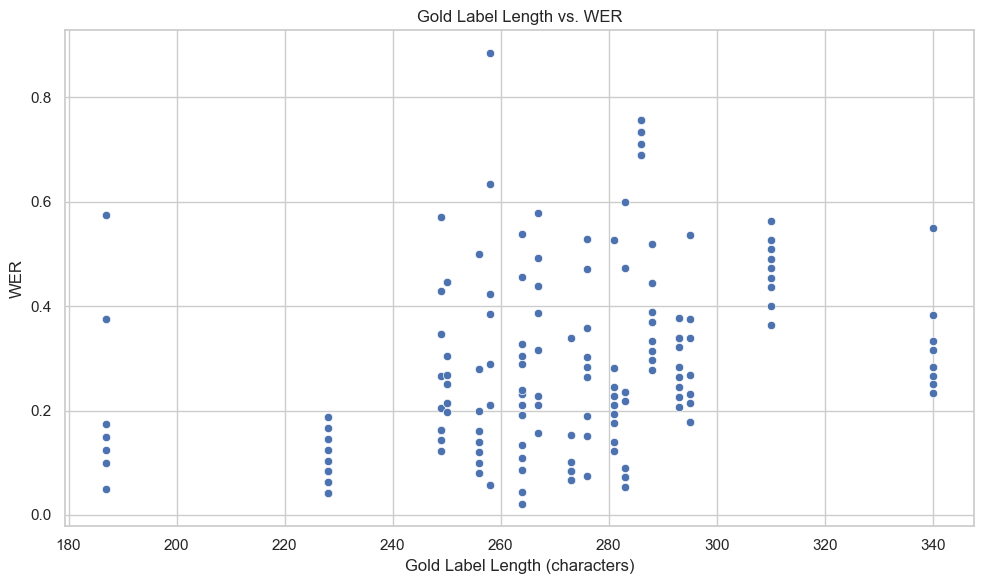

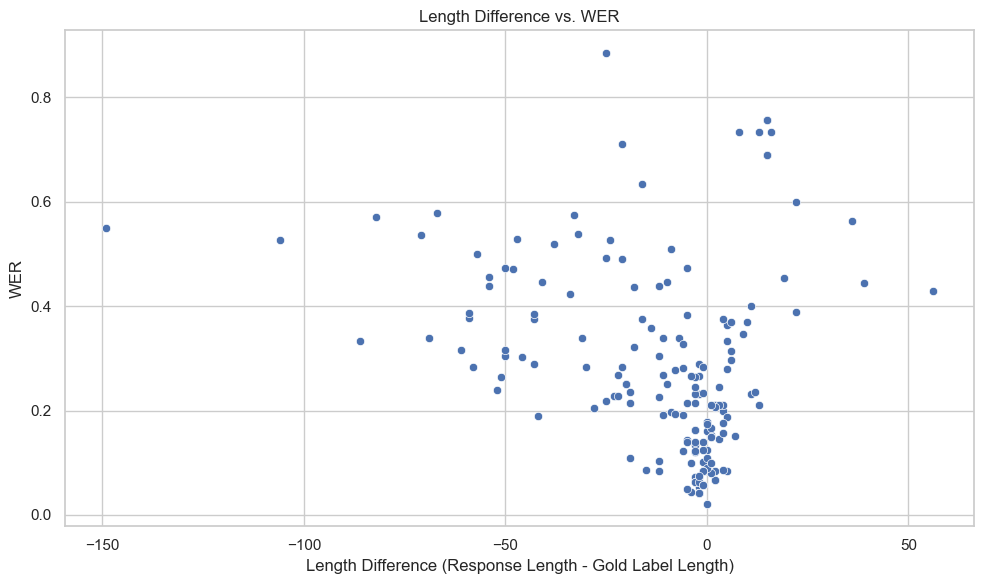

In [94]:
# Compute lengths
df['Gold Label Length'] = df['Gold Label'].apply(lambda x: len(str(x)))
df['Response Length'] = df['Response'].apply(lambda x: len(str(x)))
df['Length Difference'] = df['Response Length'] - df['Gold Label Length']

# Scatter plot of Text Length vs. WER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gold Label Length', y='WER', data=df)
plt.title('Gold Label Length vs. WER')
plt.xlabel('Gold Label Length (characters)')
plt.ylabel('WER')
plt.tight_layout()
plt.show()

# Scatter plot of Length Difference vs. WER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Length Difference', y='WER', data=df)
plt.title('Length Difference vs. WER')
plt.xlabel('Length Difference (Response Length - Gold Label Length)')
plt.ylabel('WER')
plt.tight_layout()
plt.show()

### WER and CER by Word Count

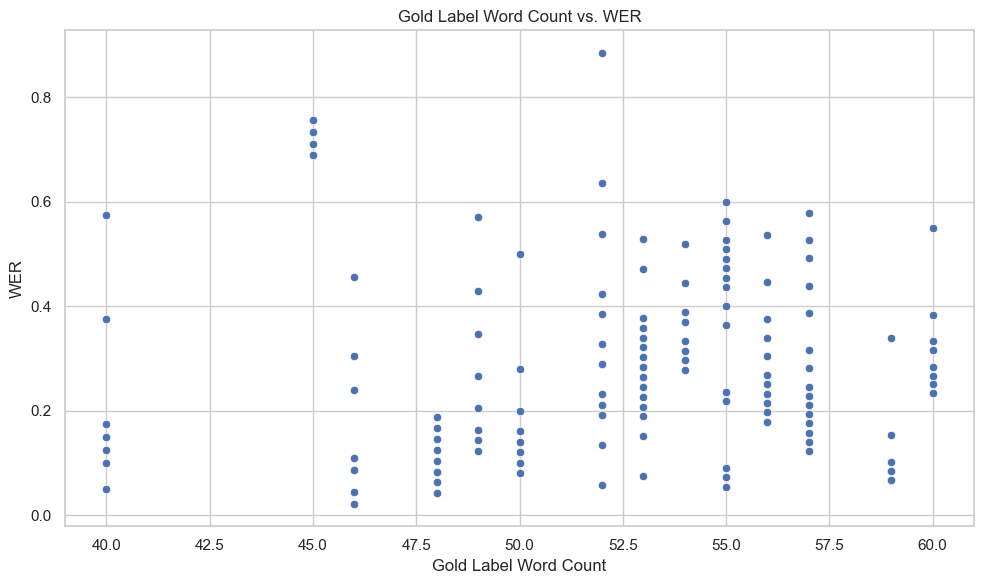

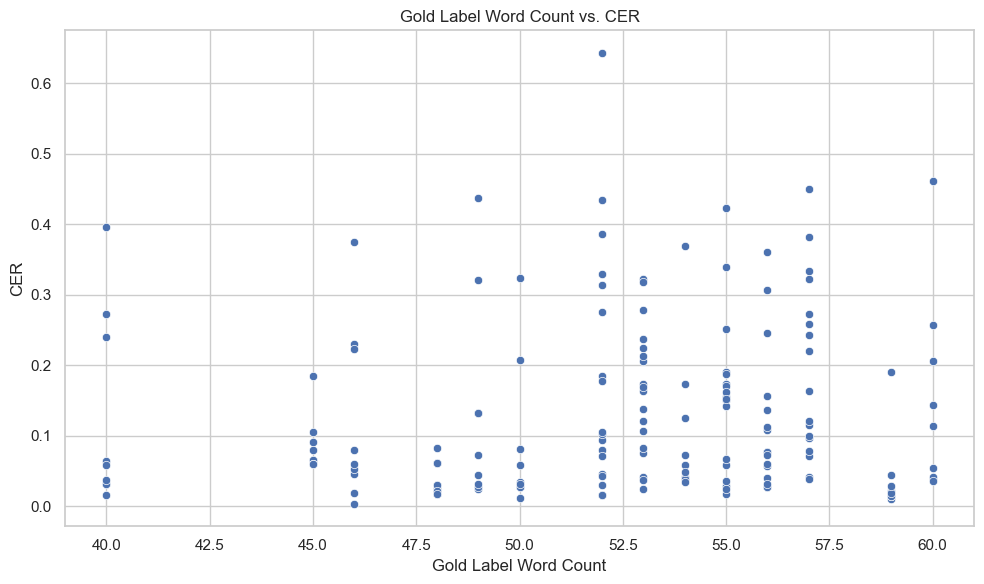

In [95]:
# Compute word counts
df['Gold Label Word Count'] = df['Gold Label'].apply(lambda x: len(str(x).split()))
df['Response Word Count'] = df['Response'].apply(lambda x: len(str(x).split()))

# Scatter plot of Word Count vs. WER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gold Label Word Count', y='WER', data=df)
plt.title('Gold Label Word Count vs. WER')
plt.xlabel('Gold Label Word Count')
plt.ylabel('WER')
plt.tight_layout()
plt.show()

# Scatter plot of Word Count vs. CER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gold Label Word Count', y='CER', data=df)
plt.title('Gold Label Word Count vs. CER')
plt.xlabel('Gold Label Word Count')
plt.ylabel('CER')
plt.tight_layout()
plt.show()

## Extended Evaluation: Analysis by Blur and Background Color

### Analysis of WER and CER by Blur Levels (Font Size 18)

#### Filter Data for Font Size 18

In [96]:
# Filter the DataFrame for entries with 'Font Size' equal to 18
df_font18 = df[df['Font Size'] == 18].copy()

print(f"Number of samples with Font Size 18: {len(df_font18)}")

Number of samples with Font Size 18: 140


#### Compute Mean WER and CER by Blur Levels

In [97]:
# Group by 'Blur' levels and compute mean WER and CER
blur_metrics = df_font18.groupby('Blur Level').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Blur Levels (Font Size 18):")
print(blur_metrics)

Mean WER and CER by Blur Levels (Font Size 18):
   Blur Level       WER       CER
0        0.00  0.269347  0.121286
1        1.25  0.253626  0.100276
2        1.75  0.345865  0.186306


#### Radar Plot for WER and CER by Blur Levels

In [98]:
# Normalize the WER and CER values for radar plot scaling
from sklearn.preprocessing import MinMaxScaler

# Combine WER and CER into a single DataFrame
blur_metrics_melted = blur_metrics.melt(id_vars='Blur Level', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

# Scale the values between 0 and 1
scaler = MinMaxScaler()
blur_metrics_melted['Scaled Value'] = scaler.fit_transform(blur_metrics_melted[['Value']])

# Pivot the DataFrame for radar plot
blur_pivot = blur_metrics_melted.pivot(index='Metric', columns='Blur Level', values='Scaled Value')

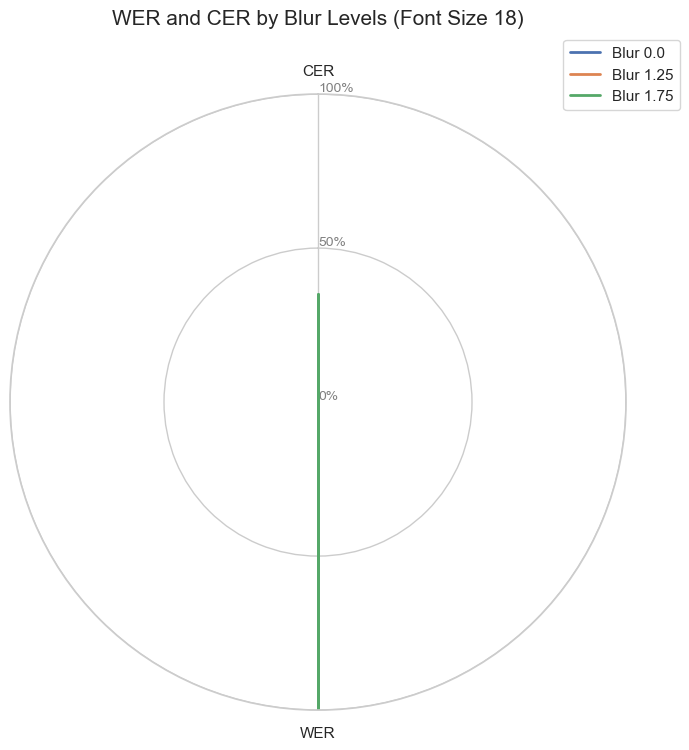

In [99]:
import numpy as np

def create_radar_chart(data, title, labels):
    # Number of variables we're plotting
    categories = list(data.index)
    N = len(categories)

    # What will be the angle of each axis in the plot (in radians)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the loop

    # Initialise the spider plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop through each Blur level and plot
    for blur_level in data.columns:
        values = data[blur_level].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=2, label=f'Blur {blur_level}')
        ax.fill(angles, values, alpha=0.25)

    # Fix axis to go in the right order and start at the top
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axis per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.0, 0.5, 1.0], ["0%", "50%", "100%"], color="grey", size=10)
    plt.ylim(0, 1)

    # Add title and legend
    plt.title(title, size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()

# Create radar chart for Blur levels
create_radar_chart(blur_pivot, 'WER and CER by Blur Levels (Font Size 18)', blur_pivot.columns)

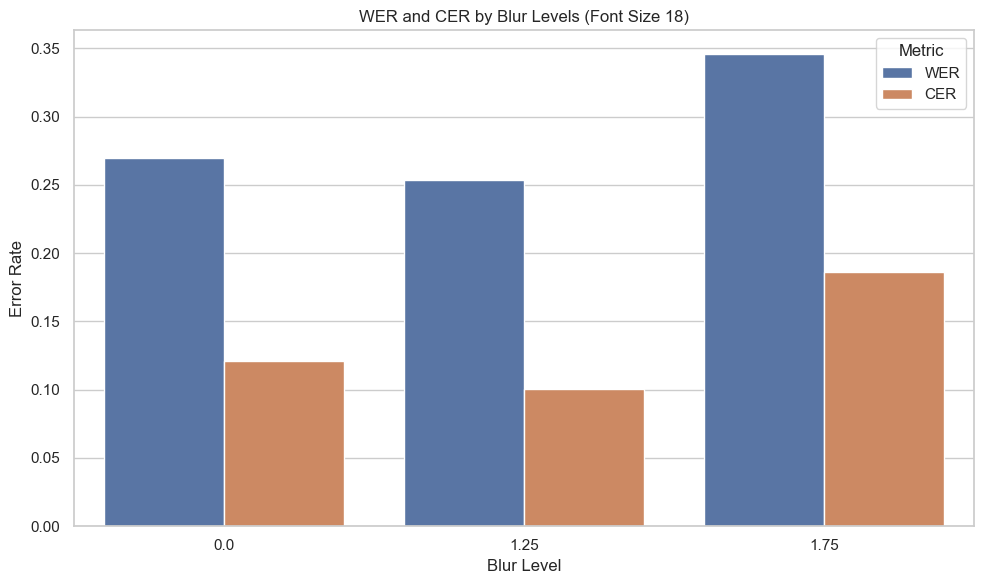

In [100]:
# Bar plot of WER and CER by Blur Levels
blur_metrics_melted = blur_metrics.melt(id_vars='Blur Level', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Blur Level', y='Value', hue='Metric', data=blur_metrics_melted)
plt.title('WER and CER by Blur Levels (Font Size 18)')
plt.xlabel('Blur Level')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Analysis of WER and CER by Background Color (Font Size 18)

### Compute Mean WER and CER by Background Color

In [101]:
# Group by 'Background Color' and compute mean WER and CER
bg_metrics = df_font18.groupby('Background Color').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Background Color (Font Size 18):")
print(bg_metrics)

Mean WER and CER by Background Color (Font Size 18):
  Background Color       WER       CER
0                0  0.257555  0.111206
1     light_yellow  0.236439  0.085608
2       slate_gray  0.422009  0.251375


### Radar Plot for WER and CER by Background Color

In [102]:
# Combine WER and CER into a single DataFrame
bg_metrics_melted = bg_metrics.melt(id_vars='Background Color', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

# Scale the values between 0 and 1
bg_metrics_melted['Scaled Value'] = scaler.fit_transform(bg_metrics_melted[['Value']])

# Pivot the DataFrame for radar plot
bg_pivot = bg_metrics_melted.pivot(index='Metric', columns='Background Color', values='Scaled Value')

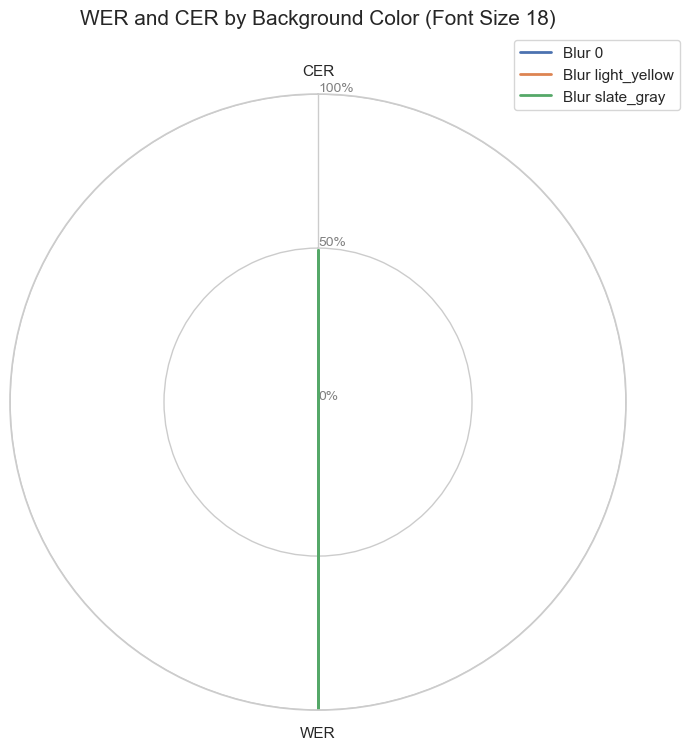

In [103]:
# Create radar chart for Background Colors
create_radar_chart(bg_pivot, 'WER and CER by Background Color (Font Size 18)', bg_pivot.columns)

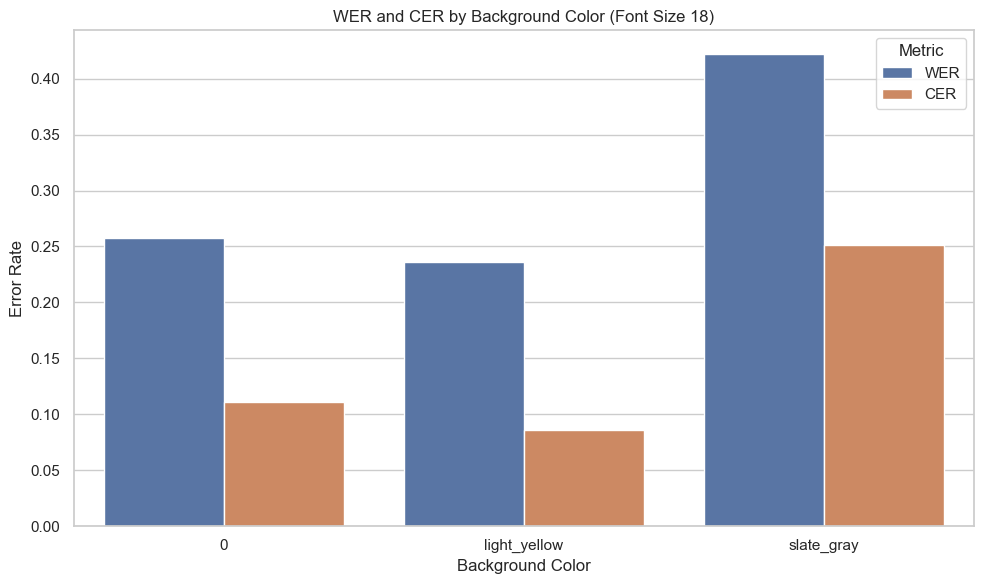

In [104]:
# Bar plot of WER and CER by Background Color
plt.figure(figsize=(10, 6))
sns.barplot(x='Background Color', y='Value', hue='Metric', data=bg_metrics_melted)
plt.title('WER and CER by Background Color (Font Size 18)')
plt.xlabel('Background Color')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Analysis of WER and CER by Font Style (Font Size 18)

In [105]:
# Filter the DataFrame for entries with 'Font Size' equal to 18
df_font18 = df[df['Font Size'] == 18].copy()

print(f"Number of samples with Font Size 18: {len(df_font18)}")


Number of samples with Font Size 18: 140


In [106]:
# Group by 'Font Style' and compute mean WER and CER
font_style_metrics = df_font18.groupby('Font Style').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Font Style (Font Size 18):")
print(font_style_metrics)

Mean WER and CER by Font Style (Font Size 18):
               Font Style       WER       CER
0          Alvi Nastaleeq  0.195762  0.058455
1  Jameel Noori Nastaleeq  0.296150  0.140114
2        Nafees Nastaleeq  0.269713  0.133991


### Bar Plot for WER and CER by Font Style

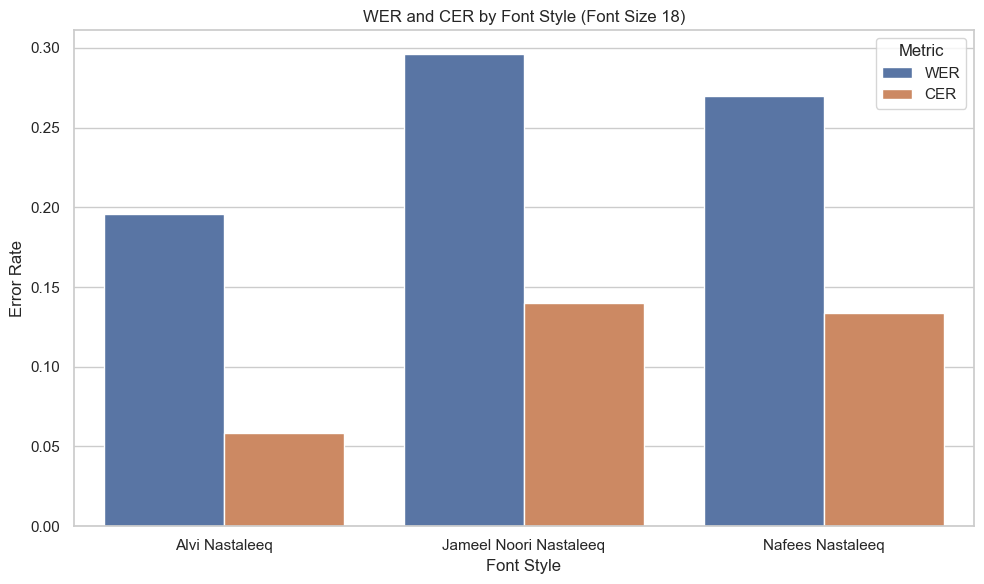

In [107]:
# Melt the DataFrame for plotting
font_style_melted = font_style_metrics.melt(id_vars='Font Style', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

# Bar plot of WER and CER by Font Style
plt.figure(figsize=(10, 6))
sns.barplot(x='Font Style', y='Value', hue='Metric', data=font_style_melted)
plt.title('WER and CER by Font Style (Font Size 18)')
plt.xlabel('Font Style')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### Radar Plot for WER and CER by Font Style

In [108]:
# Normalize the WER and CER values for radar plot scaling
from sklearn.preprocessing import MinMaxScaler

# Scale the values between 0 and 1
scaler = MinMaxScaler()
font_style_melted['Scaled Value'] = scaler.fit_transform(font_style_melted[['Value']])

# Pivot the DataFrame for radar plot
font_style_pivot = font_style_melted.pivot(index='Metric', columns='Font Style', values='Scaled Value')

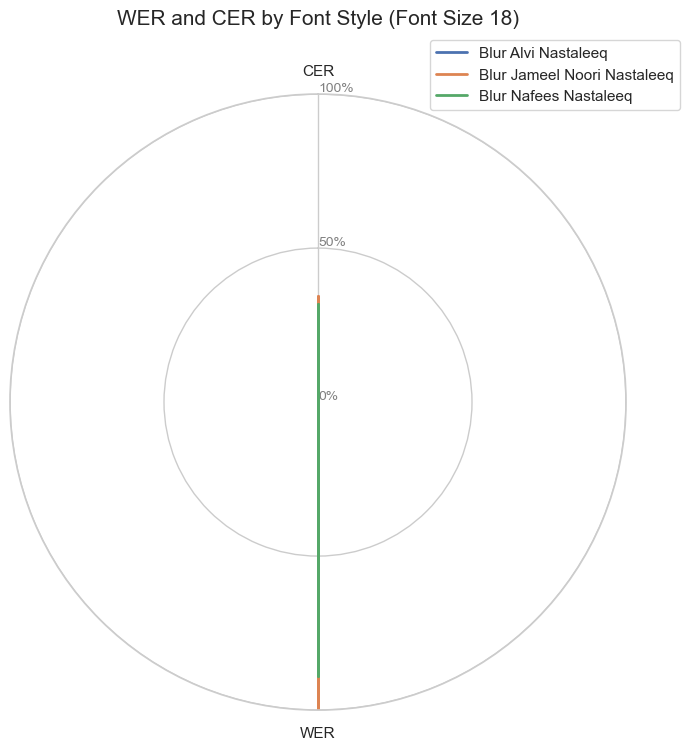

In [109]:
# Reuse the create_radar_chart function defined earlier
create_radar_chart(font_style_pivot, 'WER and CER by Font Style (Font Size 18)', font_style_pivot.columns)

## Analysis of WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq, Blur Level: 0, Background Color: 0)

In [114]:
# Filter the DataFrame
df_jameel = df[
    (df['Font Style'] == 'Jameel Noori Nastaleeq') &
    (df['Blur Level'] == 0) &
    (df['Background Color'] == '0')
].copy()

print(f"Number of samples with Font Style 'Jameel Noori Nastaleeq', Blur 0, Background Color 0: {len(df_jameel)}")

# Group by 'Font Size' and compute mean WER and CER
font_size_metrics = df_jameel.groupby('Font Size').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq):")
print(font_size_metrics)

Number of samples with Font Style 'Jameel Noori Nastaleeq', Blur 0, Background Color 0: 60
Mean WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq):
   Font Size       WER       CER
0         12  0.374122  0.208829
1         18  0.222812  0.077003
2         24  0.196970  0.034317


### Bar Plot for WER and CER by Font Size

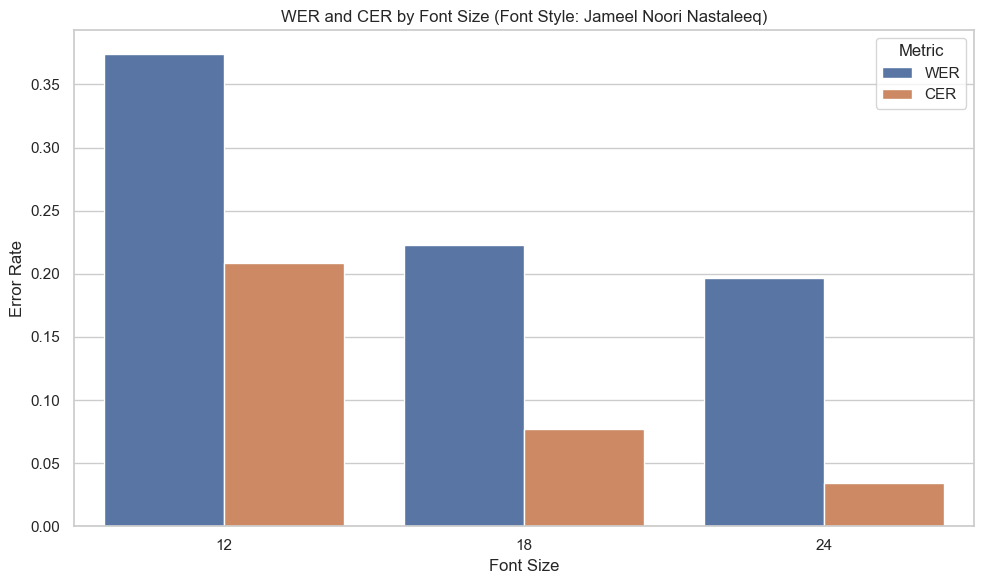

In [115]:
# Melt the DataFrame for plotting
font_size_melted = font_size_metrics.melt(id_vars='Font Size', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

# Bar plot of WER and CER by Font Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Font Size', y='Value', hue='Metric', data=font_size_melted)
plt.title('WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq)')
plt.xlabel('Font Size')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### Radar Plot for WER and CER by Font Size

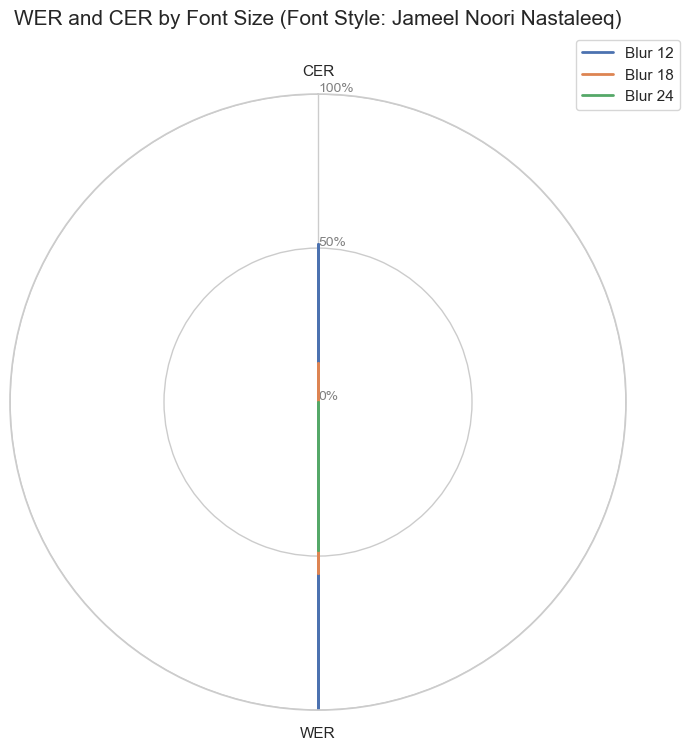

In [116]:
# Scale the values between 0 and 1
scaler = MinMaxScaler()
font_size_melted['Scaled Value'] = scaler.fit_transform(font_size_melted[['Value']])

# Pivot the DataFrame for radar plot
font_size_pivot = font_size_melted.pivot(index='Metric', columns='Font Size', values='Scaled Value')

# Create radar chart
create_radar_chart(font_size_pivot, 'WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq)', font_size_pivot.columns)